In [51]:
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [52]:
from codice_py.etl import df_players
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Histogram of height in cm')

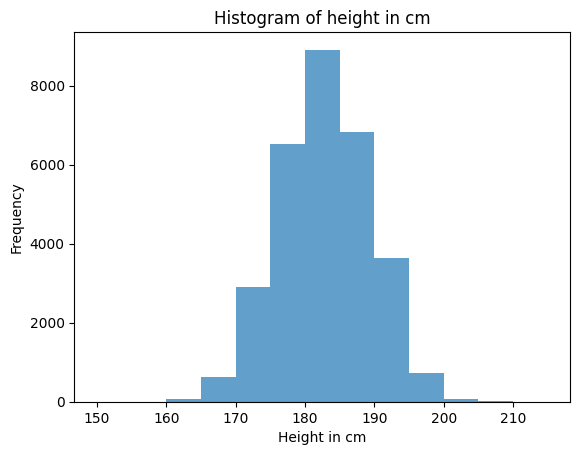

In [53]:
plt.figure()
plt.hist(df_players["height_in_cm"], bins=np.arange(150, 220, 5), alpha=0.7)

plt.xlabel("Height in cm")
plt.ylabel("Frequency")
plt.title("Histogram of height in cm")

In [54]:
%pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [68]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unione con how='left'
df_players_geo = world.merge(df_players, left_on='name', right_on='country_of_birth', how='left')
print(df_players_geo.head())

# Disegna il grafico geografico
#df_players_geo = world.merge(df_players, left_on='name', right_on='country_of_birth')
print(df_players_geo.head())



C:\Users\mikdr\AppData\Local\Temp\ipykernel_17256\554919999.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


      pop_est continent    name_x iso_a3  gdp_md_est  \
0    889953.0   Oceania      Fiji    FJI        5496   
1  58005463.0    Africa  Tanzania    TZA       63177   
2  58005463.0    Africa  Tanzania    TZA       63177   
3  58005463.0    Africa  Tanzania    TZA       63177   
4  58005463.0    Africa  Tanzania    TZA       63177   

                                            geometry  player_id  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...        NaN   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   182201.0   
2  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   568915.0   
3  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   666563.0   
4  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   833315.0   

                 name_y  last_season  current_club_id  ...   foot  \
0                   NaN          NaN              NaN  ...    NaN   
1          Ally Samatta       2023.0           1091.0  ...  right   
2  Yohana Oscar Mkomola       2020.0          49364.0

C:\Users\mikdr\AppData\Local\Temp\ipykernel_17256\1005583653.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


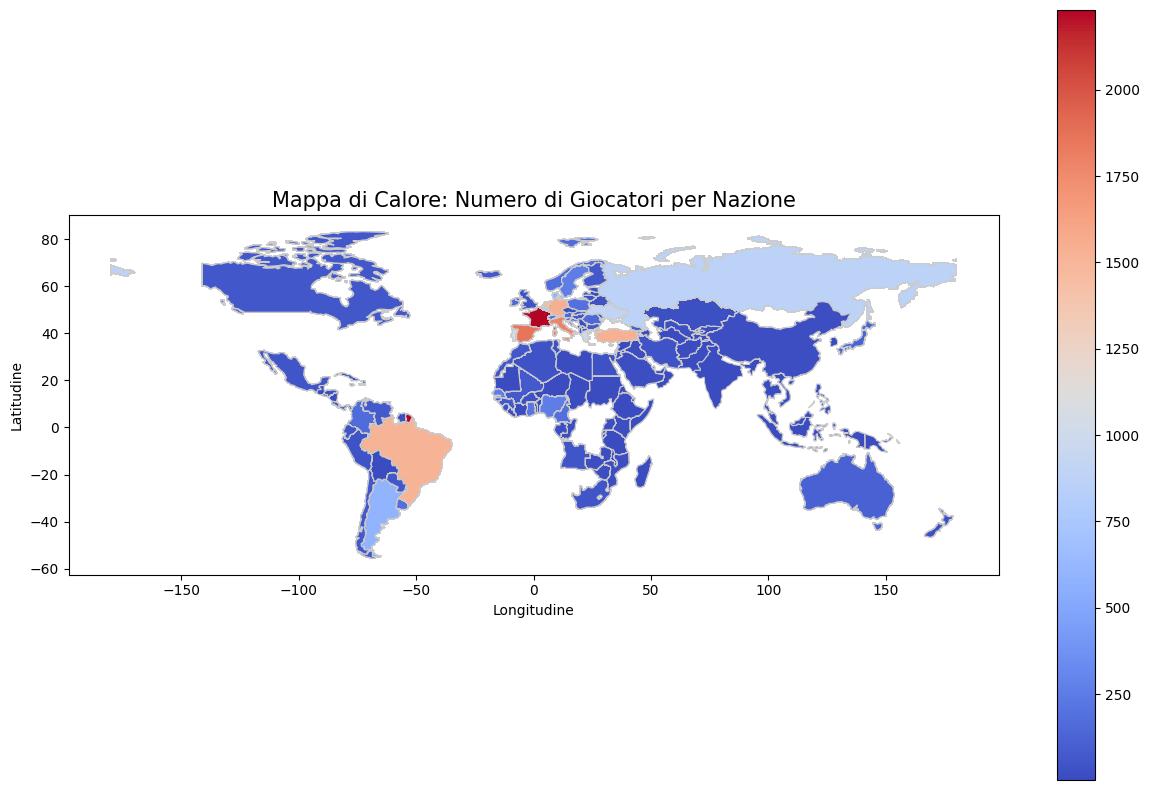

In [73]:
# Leggi il GeoDataFrame del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unione con how='left'
df_players_geo = world.merge(df_players, left_on='name', right_on='country_of_birth', how='left')

# Esegui l'aggregazione separatamente
agg_data = df_players_geo['player_id'].groupby(df_players_geo['country_of_birth']).count().reset_index()
agg_data.columns = ['country_of_birth', 'num_players']

# Unisci l'aggregazione con il tuo DataFrame
df_players_geo = pd.merge(df_players_geo, agg_data, on='country_of_birth', how='left')

# Disegna la mappa di calore
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Usa il metodo plot di GeoDataFrame per visualizzare la mappa di calore
df_players_geo.plot(column='num_players', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Aggiungi titolo e etichette
ax.set_title('Mappa di Calore: Numero di Giocatori per Nazione', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Mostra la legenda
leg = ax.get_legend()
if leg is not None:
    leg.set_bbox_to_anchor((1, 0.5))

# Mostra il grafico
plt.show()
